## Portfolio Alpha

In [293]:
import yfinance as yf
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
from scipy.stats import spearmanr

In [ ]:
# Here we will simply compute the weighted beta of the stocks in our portfolio and input it into the CAPM.
# sfsdsdfdsfsd

## Individual Risk/Return Data

### In this cell below, we call the global variables we have defined from the respective risk models for each stock. These are 3-Month moving averages based on the monthly return inputs in the factor models.

In [267]:
%store -r SBGSY_return
SBGSY_return = pd.DataFrame(SBGSY_return[1])
SBGSY_return.columns = ['SBGSY']

%store -r ET_return
ET_return = pd.DataFrame(ET_return[1])
ET_return.columns = ['ET']

%store -r VICI_return
VICI_return = pd.DataFrame(VICI_return[1])
VICI_return.columns = ['VICI']




### $SBGSY - Schneider Electric

In [268]:
ticker = 'SBGSY'

data = yf.download(ticker, period='5y', interval='1mo')

data['Monthly Return'] = data['Adj Close'].pct_change()

SBGSY_3M = np.nan_to_num(np.array(data['Monthly Return']))


sbgsy_alpha = SBGSY_3M - np.array(SBGSY_return.SBGSY)
print("SBGSY Alpha 3-Month Moving Average:", sbgsy_alpha[-1]*100,'%')


[*********************100%***********************]  1 of 1 completed

SBGSY Alpha 3-Month Moving Average: -2.3530878597229616 %


### $ET - Energy Transfer

In [269]:
ticker = 'ET'

data = yf.download(ticker, period='5y', interval='1mo')

data['Monthly Return'] = data['Adj Close'].pct_change()

ET_3M = np.nan_to_num(np.array(data['Monthly Return']))

ET_return = np.array(ET_return.ET)


et_alpha = ET_3M - ET_return
print("ET Alpha 3-Month Moving Average:", (et_alpha[-1])*100, '%')

[*********************100%***********************]  1 of 1 completed

ET Alpha 3-Month Moving Average: 2.7834695149341693 %


### $VICI - Vici Properties

In [270]:
ticker = 'VICI'

data = yf.download(ticker, period='5y', interval='1mo')

data['Monthly Return'] = data['Adj Close'].pct_change()

VICI_3M = np.nan_to_num(np.array(data['Monthly Return']))

VICI_return = np.array(VICI_return.VICI)

vici_alpha = VICI_3M - VICI_return
print("VICI Alpha 3-Month Moving Average:", (vici_alpha[-1])*100, '%')

[*********************100%***********************]  1 of 1 completed

VICI Alpha 3-Month Moving Average: -2.02595146518344 %


### $VSCO - Victoria's Secret

In [271]:
ticker = 'VSCO'

data = yf.download(ticker, period='5y', interval='1mo')

data['Monthly Return'] = data['Adj Close'].pct_change()

VSCO_1M = np.nan_to_num(np.array(data['Monthly Return']))

vsco_alpha = VSCO_1M


[*********************100%***********************]  1 of 1 completed


### Alpha and Expected Return Correlation

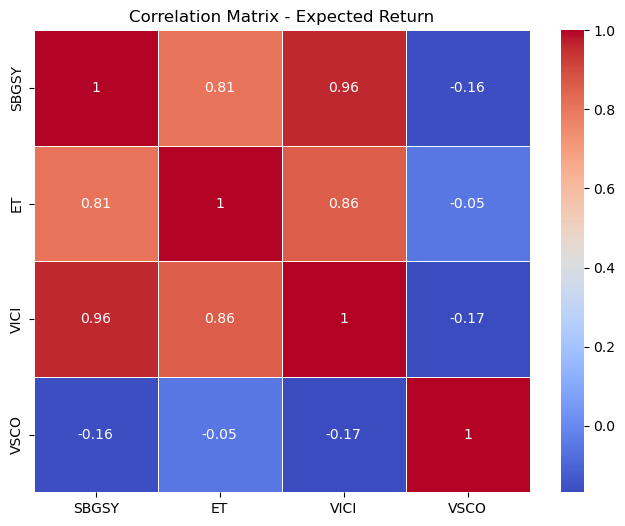

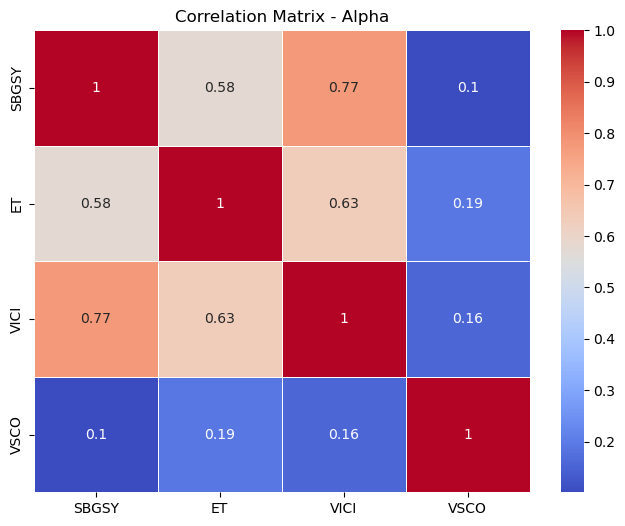

In [272]:
def np_to_pd(array, ticker):
    df = pd.DataFrame(array, columns=[ticker])
    return df


corr_df_er = pd.concat([np_to_pd(SBGSY_return, 'SBGSY'), np_to_pd(ET_return, 'ET'), np_to_pd(VICI_return, 'VICI'), np_to_pd(VSCO_1M, 'VSCO')], axis = 1)
corr_matrix_er = corr_df_er.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_er, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Expected Return')
plt.show()

corr_df_alpha = pd.concat([np_to_pd(sbgsy_alpha, 'SBGSY'), np_to_pd(et_alpha, 'ET'), np_to_pd(vici_alpha, 'VICI'), np_to_pd(vsco_alpha, 'VSCO')], axis = 1)
corr_matrix_alpha = corr_df_alpha.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_alpha, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Alpha')
plt.show()


## Correlation Matrix - Stocks

### This matrix is just loaded with raw daily price data, not the outputs of our factor model. With this, we can assess any potential correlation spikes/breakdowns - for example, we may see a pickup here that we cannot see in our factor models and vice versa

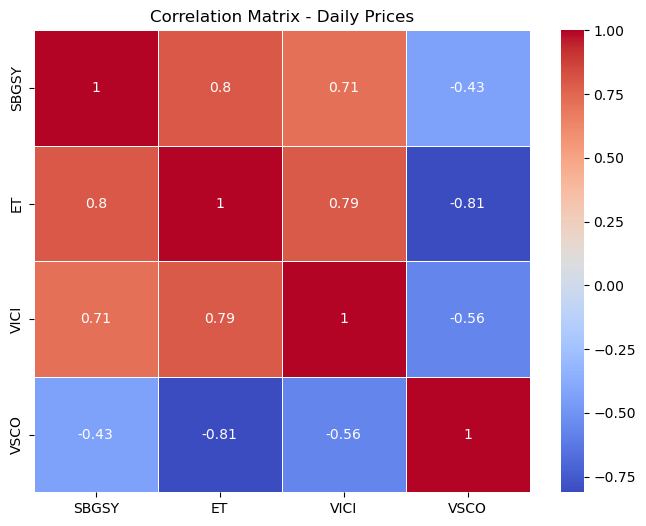

In [291]:
def get_ticker_data(ticker):
    ticker_data = yf.Ticker(f'{ticker}')
    ticker_5y = ticker_data.history(period = '5y')
    ticker_5y = pd.DataFrame(ticker_5y['Close'])
    ticker_5y.columns = [ticker]
    return ticker_5y

sbgsy = get_ticker_data('SBGSY')
et = get_ticker_data('ET')
vici = get_ticker_data('VICI')
vsco = get_ticker_data('VSCO')

corr_df_price = pd.concat([sbgsy, et, vici, vsco], axis = 1)
corr_matrix_price = corr_df_price.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_price, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Daily Prices')
plt.show()

## Portfolio Volatility

In [290]:
def portfolio_volatility(weights, volatilities, correlation_matrix):
    # Convert volatilities to a diagonal matrix (2D)
    vol_matrix = np.diag(volatilities)
    
    # Calculate the covariance matrix from volatilities and correlations
    covariance_matrix = vol_matrix @ correlation_matrix @ vol_matrix
    
    # Calculate portfolio variance
    portfolio_variance = weights.T @ covariance_matrix @ weights
    
    # Portfolio volatility is the square root of the variance
    portfolio_volatility = np.sqrt(portfolio_variance)

    
    return portfolio_volatility


weights = [0.25, 0.25, 0.25, 0.25]
volatilities = np.array([np.std(vici.VICI), np.std(sbgsy.SBGSY), np.std(et.ET), np.std(vsco.VSCO)])
correlation_matrix = pd.DataFrame(vici, sbgsy, et, vsco)
correlation_matrix
correlation_matrix = correlation_matrix.corr(method = 'spearmanr')



    

TypeError: Cannot interpret '                                VSCO
Date                                
2021-07-21 00:00:00-04:00  42.500000
2021-07-22 00:00:00-04:00  40.900002
2021-07-23 00:00:00-04:00  42.139999
2021-07-26 00:00:00-04:00  41.200001
2021-07-27 00:00:00-04:00  41.435001
...                              ...
2024-10-15 00:00:00-04:00  26.430000
2024-10-16 00:00:00-04:00  28.180000
2024-10-17 00:00:00-04:00  27.629999
2024-10-18 00:00:00-04:00  27.480000
2024-10-21 00:00:00-04:00  28.540001

[819 rows x 1 columns]' as a data type

# Sheets API stuff

In [292]:
import os
import pickle
import pandas as pd
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from googleapiclient.discovery import build

# If modifying these SCOPES, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# The ID of the target Google Sheet.
SPREADSHEET_ID = '1Cw-1c2tUGe6YRIwUUIT1obl1cxEEKJVk0y2SwrExidE'  # Replace with your sheet ID

# Load credentials.json
def get_credentials():
    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)
    return creds

def write_data_to_sheets(data, range_name):
    creds = get_credentials()
    service = build('sheets', 'v4', credentials=creds)
    sheet = service.spreadsheets()

    # Prepare data to insert into Google Sheets
    values = data.to_numpy().tolist()  # Converting DataFrame to list

    # Prepare body to write to Google Sheets
    body = {
        'values': values
    }

    result = sheet.values().update(
        spreadsheetId=SPREADSHEET_ID,
        range=range_name,  # Use the passed range name
        valueInputOption="RAW",
        body=body
    ).execute()

    print(f"{result.get('updatedCells')} cells updated.")

# Example: Read data from a CSV file using pandas
def main():
    # Load your data (you can pull data from VSCode or any local source)
    data_list = [corr_matrix_alpha, corr_matrix_er, corr_matrix_price]
    data = data_list[2]   # Replace with your data source

    range_list = ['Alpha Correlation!B2', 'Expected Return Correlation!B2', 'Price Correlation!B2']
    
    # Specify the range for the specific sub-sheet
    range_name = range_list[2]  # Change this to your desired sheet and range
    
    write_data_to_sheets(data, range_name)  # Pass the range name

if __name__ == '__main__':
    main()


16 cells updated.
